In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import geoplot

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width = None
pd.set_option('display.expand_frame_repr', False)
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

In [3]:
df = pd.read_excel(r'datasets/sample.xls')

In [4]:
df.shape

(641, 15)

In [5]:
df.head()

,STATE,DISTRICT,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016
0,MADHYA PRADESH,JHABUA,6.24,NaN,NaN,NaN,9.64,NaN,NaN,6.83,NaN,NaN,5.68,NaN,7.37
1,JAMMU & KASHMIR,JAMMU,5.91,NaN,NaN,NaN,5.49,NaN,NaN,4.50,NaN,NaN,5.13,NaN,5.21
2,BIHAR,DARBHANGA,3.30,NaN,NaN,NaN,4.44,NaN,NaN,4.23,NaN,NaN,3.65,NaN,4.76
3,BIHAR,SHEOHAR,1.44,NaN,NaN,NaN,2.76,NaN,NaN,3.25,NaN,NaN,2.52,NaN,3.04
4,MIZORAM,LUNGLEI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.sort_values(['STATE', 'DISTRICT'], ascending=[True, True])

In [7]:
df

,STATE,DISTRICT,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016
568,ANDAMAN & NICOBAR,NICOBAR,NaN,NaN,NaN,NaN,4.16,NaN,NaN,NaN,NaN,NaN,1.80,NaN,NaN
394,ANDAMAN & NICOBAR,NORTH & MIDDLE ANDAMAN,NaN,NaN,NaN,NaN,2.07,NaN,NaN,NaN,NaN,NaN,0.93,NaN,NaN
403,ANDAMAN & NICOBAR,SOUTH ANDAMAN,NaN,NaN,NaN,NaN,2.58,NaN,NaN,NaN,NaN,NaN,1.11,NaN,NaN
13,ANDHRA PRADESH,ANANTAPUR,8.35,NaN,NaN,NaN,9.53,NaN,NaN,9.63,NaN,NaN,7.36,NaN,6.75
637,ANDHRA PRADESH,CHITTOOR,8.67,NaN,NaN,NaN,10.14,NaN,NaN,9.96,NaN,NaN,7.91,NaN,2.67
178,ANDHRA PRADESH,EAST GODAVARI,3.92,NaN,NaN,NaN,4.59,NaN,NaN,2.96,NaN,NaN,3.36,NaN,3.41
321,ANDHRA PRADESH,GUNTUR,3.60,NaN,NaN,NaN,5.42,NaN,NaN,4.59,NaN,NaN,4.99,NaN,5.06
333,ANDHRA PRADESH,KRISHNA,3.74,NaN,NaN,NaN,5.17,NaN,NaN,3.91,NaN,NaN,4.97,NaN,5.19
14,ANDHRA PRADESH,KURNOOL,5.07,NaN,NaN,NaN,7.44,NaN,NaN,8.21,NaN,NaN,6.06,NaN,7.06
412,ANDHRA PRADESH,PRAKASAM,5.45,NaN,NaN,NaN,7.89,NaN,NaN,7.36,NaN,NaN,7.72,NaN,7.42


In [8]:
# set the filepath and load in a shapefile
fp = "map/india_ds.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,geometry
0,"POLYGON ((74.30254 35.65012, 73.84581 35.82461..."
1,"POLYGON ((74.89890 35.62939, 75.04768 35.77413..."
2,"POLYGON ((75.98059 35.93823, 76.16165 35.91142..."
3,"POLYGON ((73.27244 35.81596, 73.32610 35.79237..."
4,"POLYGON ((74.30254 35.65012, 74.54015 35.50695..."


In [9]:
map_df

,geometry
0,"POLYGON ((74.30254 35.65012, 73.84581 35.82461..."
1,"POLYGON ((74.89890 35.62939, 75.04768 35.77413..."
2,"POLYGON ((75.98059 35.93823, 76.16165 35.91142..."
3,"POLYGON ((73.27244 35.81596, 73.32610 35.79237..."
4,"POLYGON ((74.30254 35.65012, 74.54015 35.50695..."
5,"POLYGON ((75.18814 34.81081, 75.29891 34.73070..."
6,"POLYGON ((74.82630 34.11914, 74.72591 34.31426..."
7,"POLYGON ((75.41571 34.32388, 75.47666 34.24862..."
8,"POLYGON ((75.46226 33.35521, 75.56529 33.56164..."
9,"POLYGON ((74.32897 34.09258, 74.73025 34.07818..."


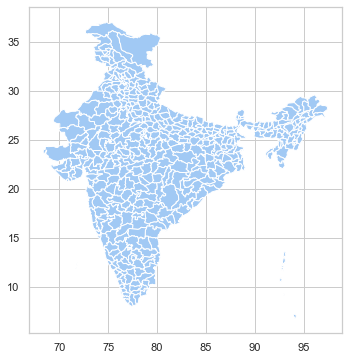

In [10]:
map_df.plot()

In [11]:
map_df['DISTRICT'] = map_df.DISTRICT.str.upper()
map_df.head()

AttributeError: 'GeoDataFrame' object has no attribute 'DISTRICT'

In [ ]:
df = df.join(map_df.set_index(['DISTRICT','STATE']), on=['DISTRICT','STATE'])

In [ ]:
df

In [ ]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

In [ ]:
print(df[df["geometry"].isnull()][['DISTRICT','STATE']])